- explorer trade-off entre MSE et terme addiutionel de loss,  $\alpha$ and $\beta$ remain unchangeable 
 - ~~idée de combiner loss 12 jours avec architecture stackée. + terme additionnel.~~
 - ~~evolution de la ‘masse’ pour UNet~~
 -~~correction via facteur multiplicatif~~
 - ~~NB tracer le temps 0 dans les courbes de loss.~~

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sf
from IPython import display
import math as mt
import matplotlib.animation as animation
import xarray as xr
import seaborn as sns
import myfuncts 

sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

# Mass-cons for Unet

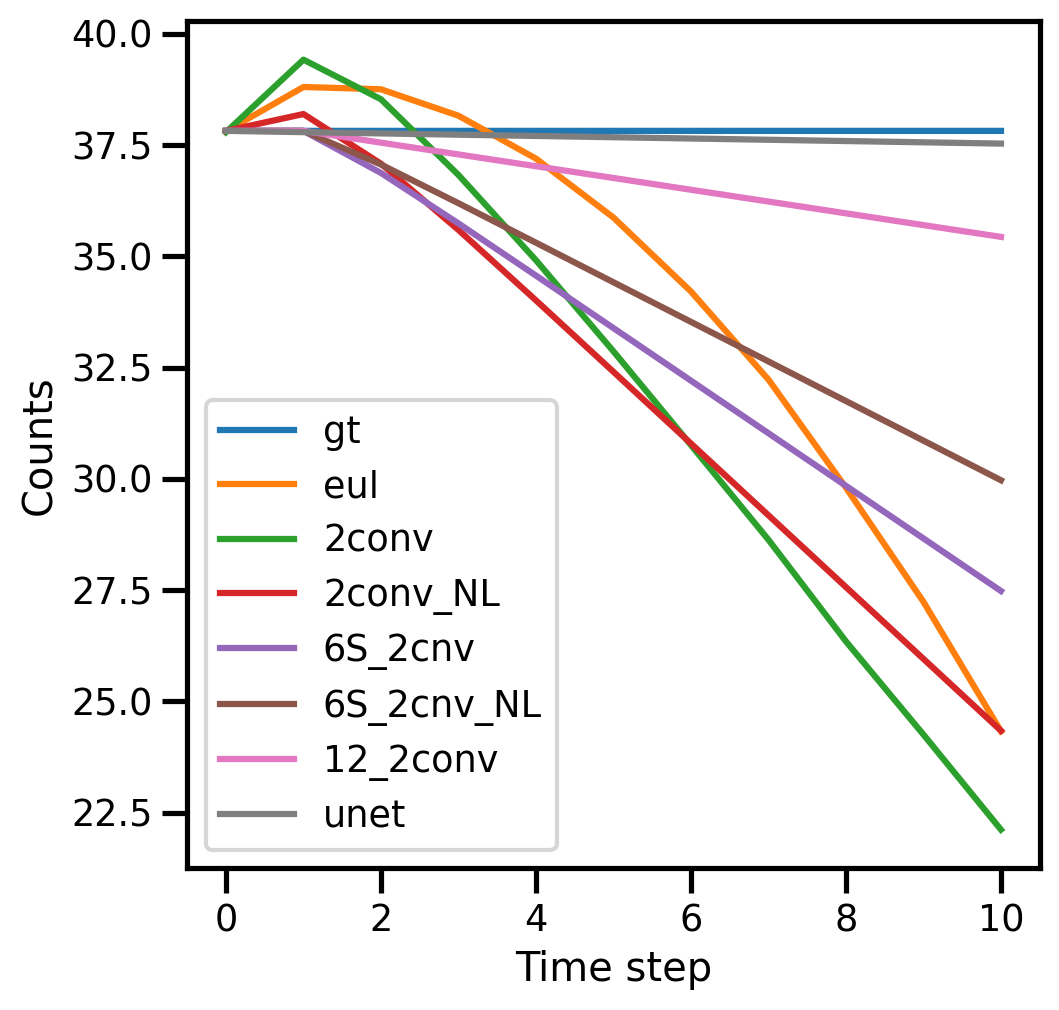

In [2]:
gt_, ml_, ml12_, ml2cN_, ml62c_, ml62cN_, eul_, unet_=myfuncts.load_snapsp()
plt.rcParams["figure.figsize"] = [5.50, 5.50]
plt.plot(gt_, label='gt')
plt.plot(eul_, label='eul')
plt.plot(ml_, label='2conv')
plt.plot(ml2cN_, label='2conv_NL')
plt.plot(ml62c_, label='6S_2cnv')
plt.plot(ml62cN_, label='6S_2cnv_NL')
plt.plot(ml12_, label='12_2conv')
plt.plot(unet_, label='unet')
    #print(sim.name)
plt.ylabel('Counts')
plt.xlabel('Time step')
plt.legend()

plt.show()

### Correction via multiplication factor

mass is conserved but not at right places...

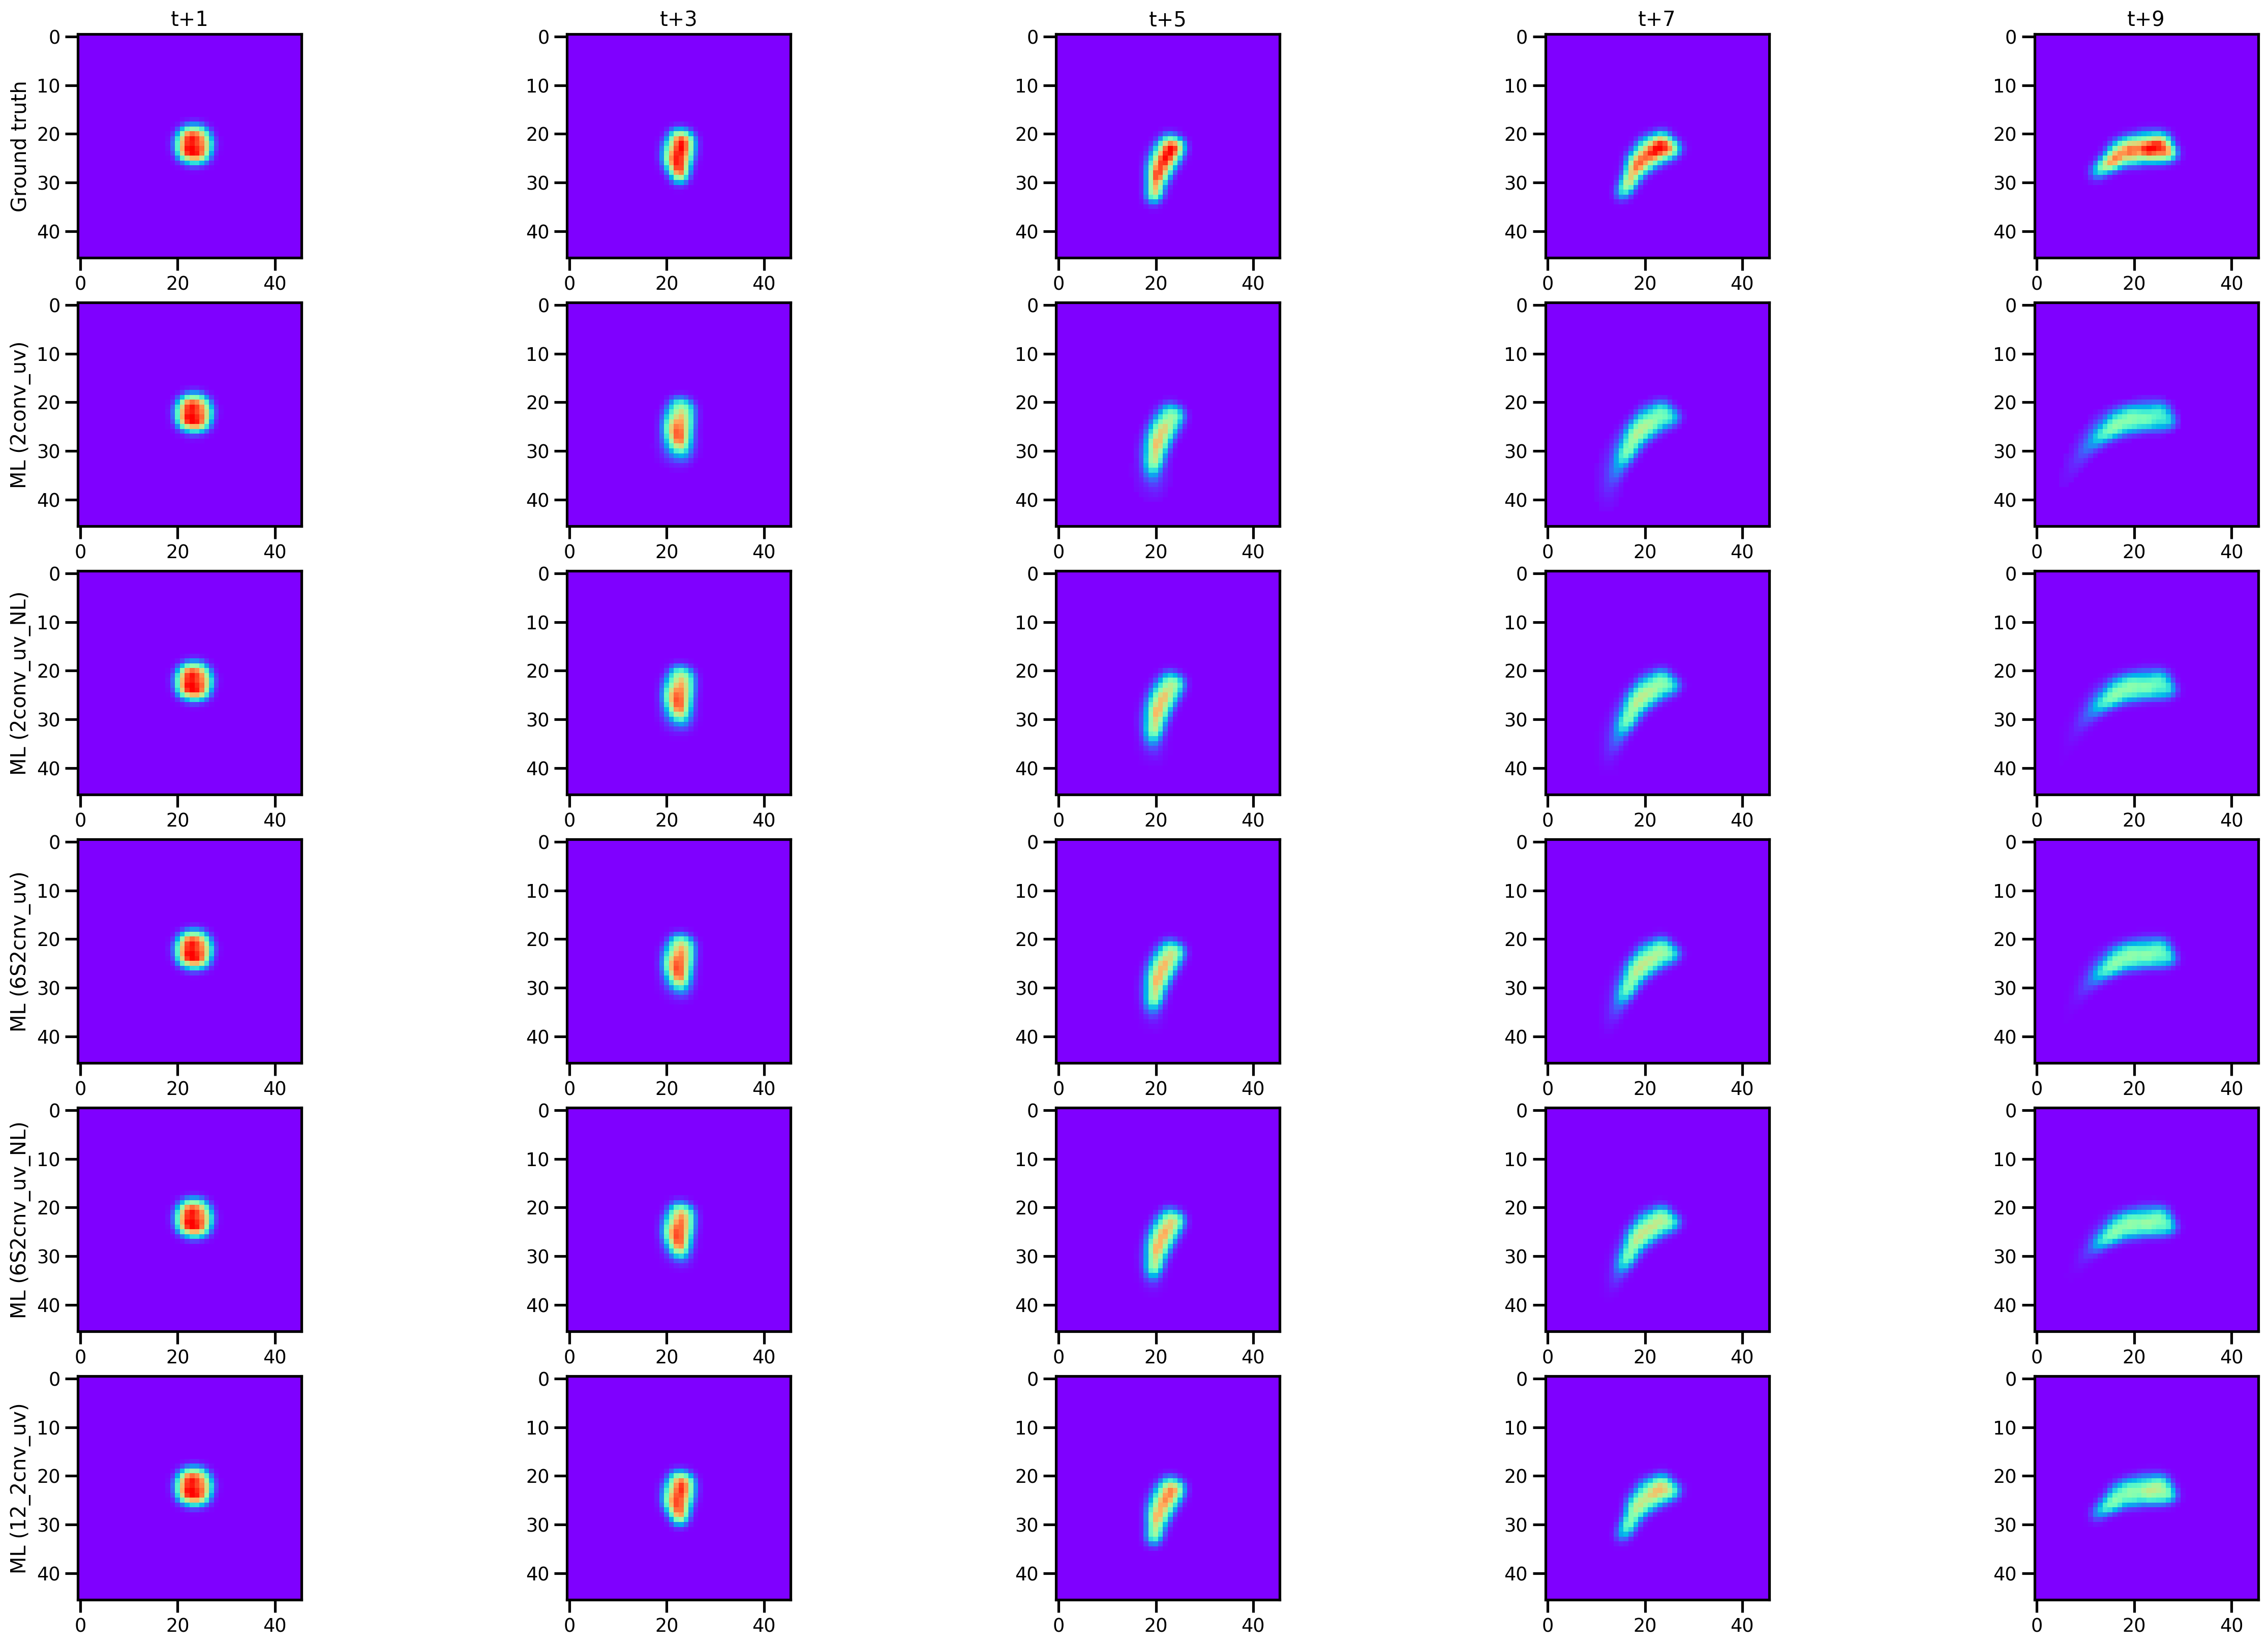

In [3]:
import matplotlib.cm as cm             

gt, ml, ml12, ml2cN, ml62c, ml62cN=myfuncts.load_snapsn()

fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(30,20))
axs.shape


k=23
for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    #print(ind)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow)
    axs[1,j].imshow(ml[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[2,j].imshow(ml2cN[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[3,j].imshow(ml62c[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[4,j].imshow(ml62cN[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[5,j].imshow(ml12[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (2conv_uv)')
axs[2,0].set_ylabel('ML (2conv_uv_NL)')
axs[3,0].set_ylabel('ML (6S2cnv_uv)')
axs[4,0].set_ylabel('ML (6S2cnv_uv_NL)')
axs[5,0].set_ylabel('ML (12_2cnv_uv)')
plt.show()
#ml[i].sum()
#gt[i].sum()

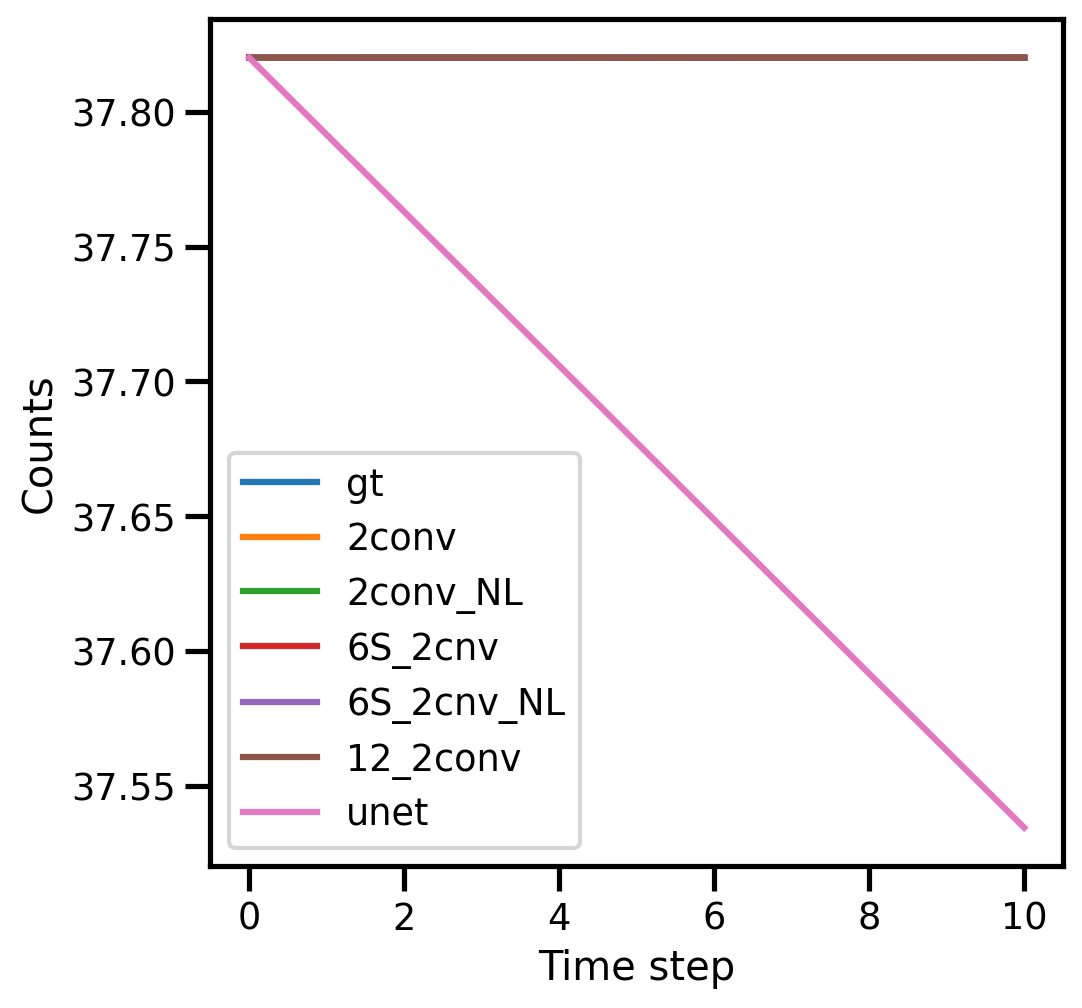

In [4]:
gt_, ml_, ml12_, ml2cN_, ml62c_, ml62cN_, eul_, unet_=myfuncts.load_snapsp2()
plt.rcParams["figure.figsize"] = [5.50, 5.50]
plt.plot(gt_, label='gt')
plt.plot(ml_, label='2conv')
plt.plot(ml2cN_, label='2conv_NL')
plt.plot(ml62c_, label='6S_2cnv')
plt.plot(ml62cN_, label='6S_2cnv_NL')
plt.plot(ml12_, label='12_2conv')
plt.plot(unet_, label='unet')
    #print(sim.name)
plt.ylabel('Counts')
plt.xlabel('Time step')
plt.legend()

plt.show()

### Start losses from 0

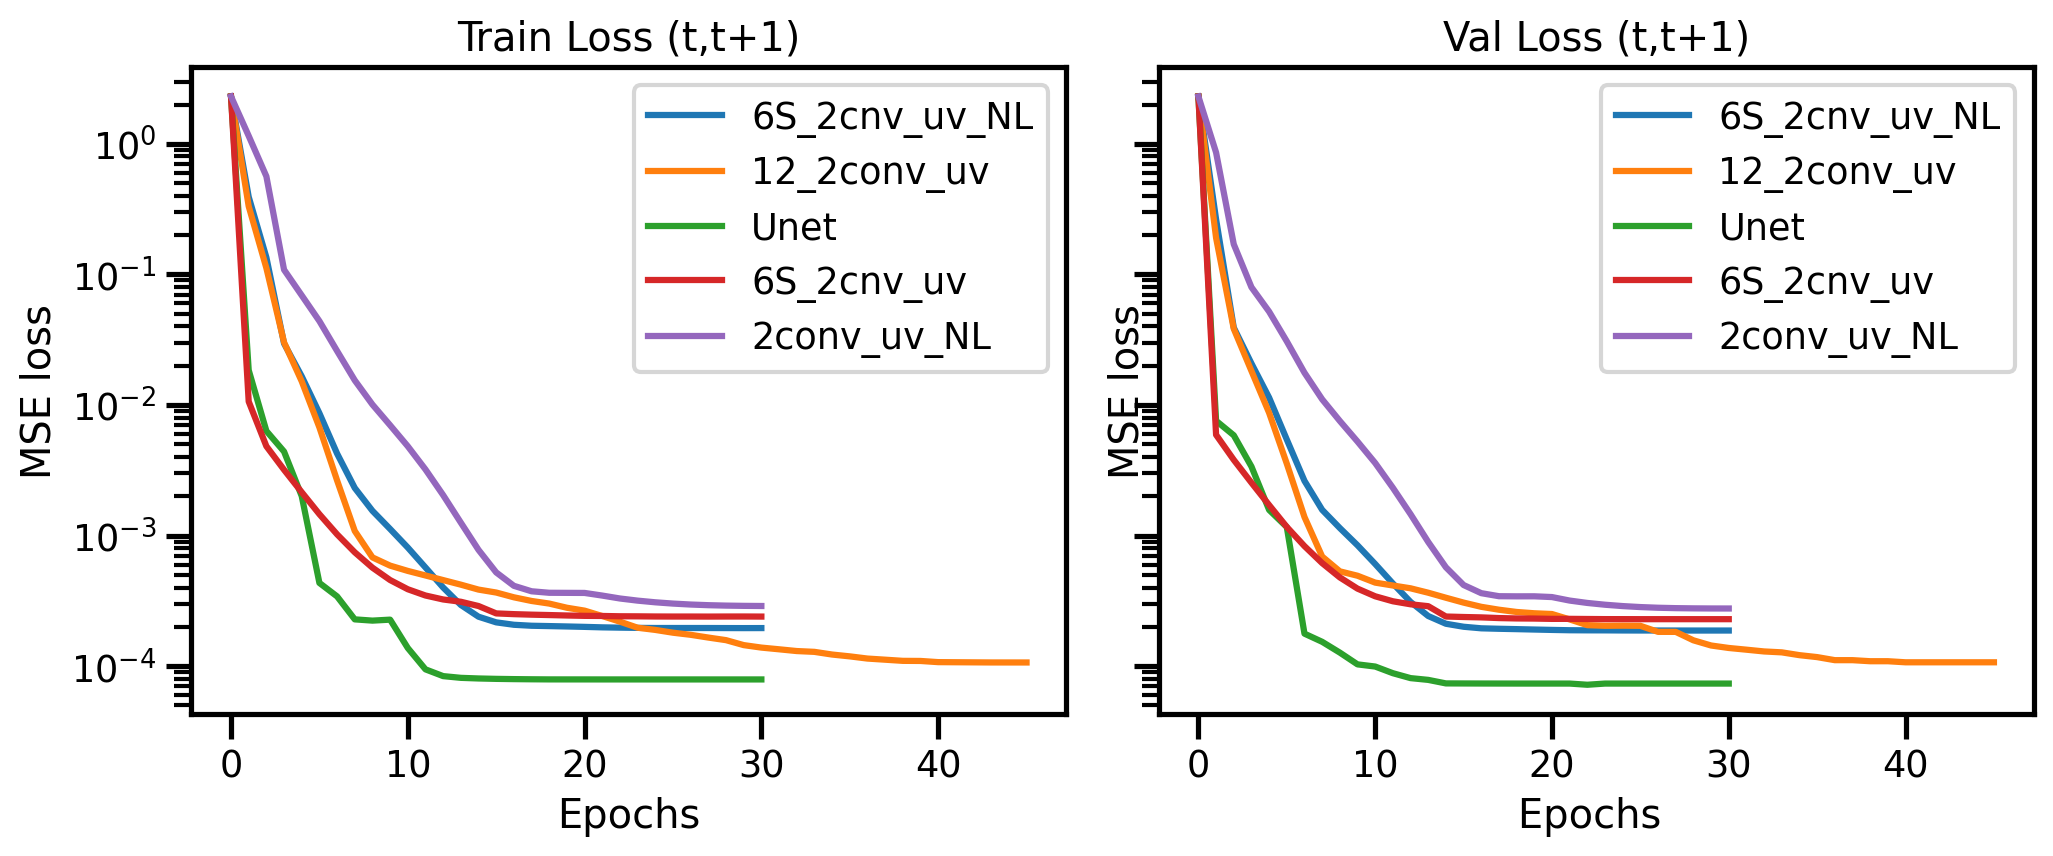

In [6]:
import myfuncts 

sims=myfuncts.load_sims5_1()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)
        #print(sim.name +' :', sim.tloss[29])
        
ax1.title.set_text('Train Loss (t,t+1)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')
#ax1.set_xscale('log')
#ax2.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')
#ax1.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')

ax2.title.set_text('Val Loss (t,t+1)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')
ax2.legend()
#ax2.set_yscale('log')
#ax2.set_xscale('log')
#ax2.set_xlim([20, 45])
plt.tight_layout()
plt.show()

# combine stacked with 12-days and new loss

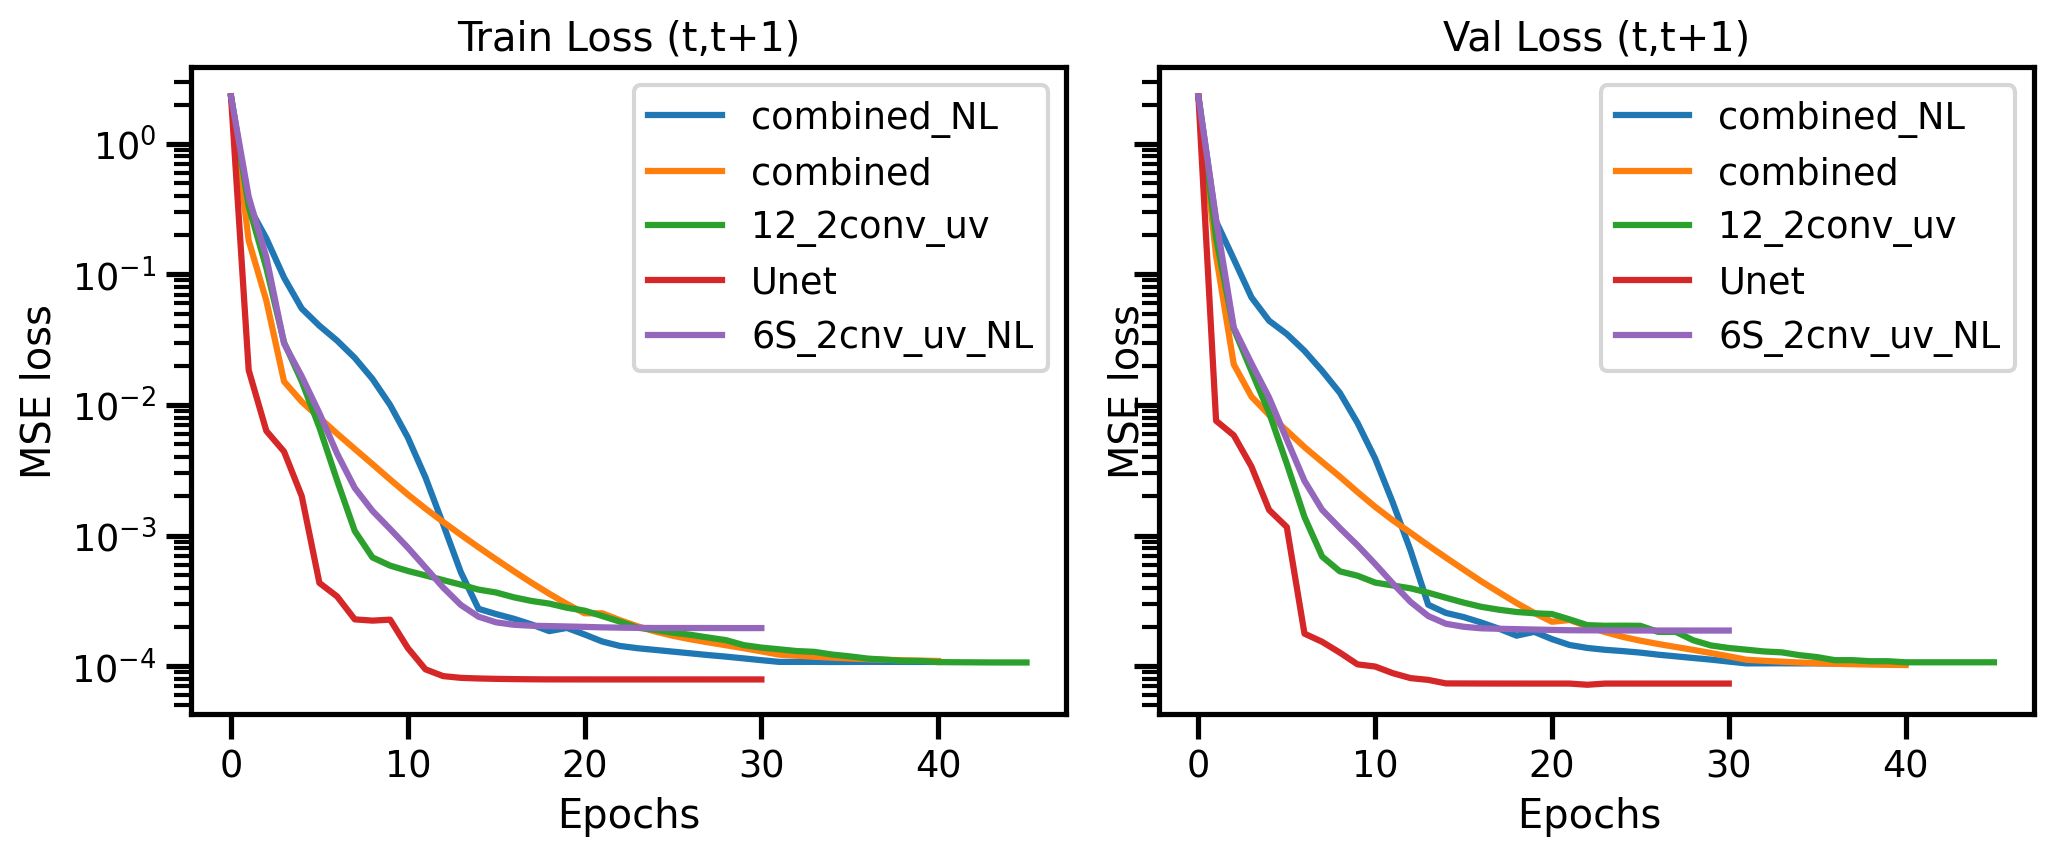

In [7]:
import myfuncts 

sims=myfuncts.load_sims5_2()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)
        #print(sim.name +' :', sim.tloss[29])
        
ax1.title.set_text('Train Loss (t,t+1)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')
#ax1.set_xscale('log')
#ax2.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')
#ax1.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')

ax2.title.set_text('Val Loss (t,t+1)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')
ax2.legend()
#ax2.set_yscale('log')
#ax2.set_xscale('log')
#ax2.set_xlim([20, 45])
plt.tight_layout()
plt.show()


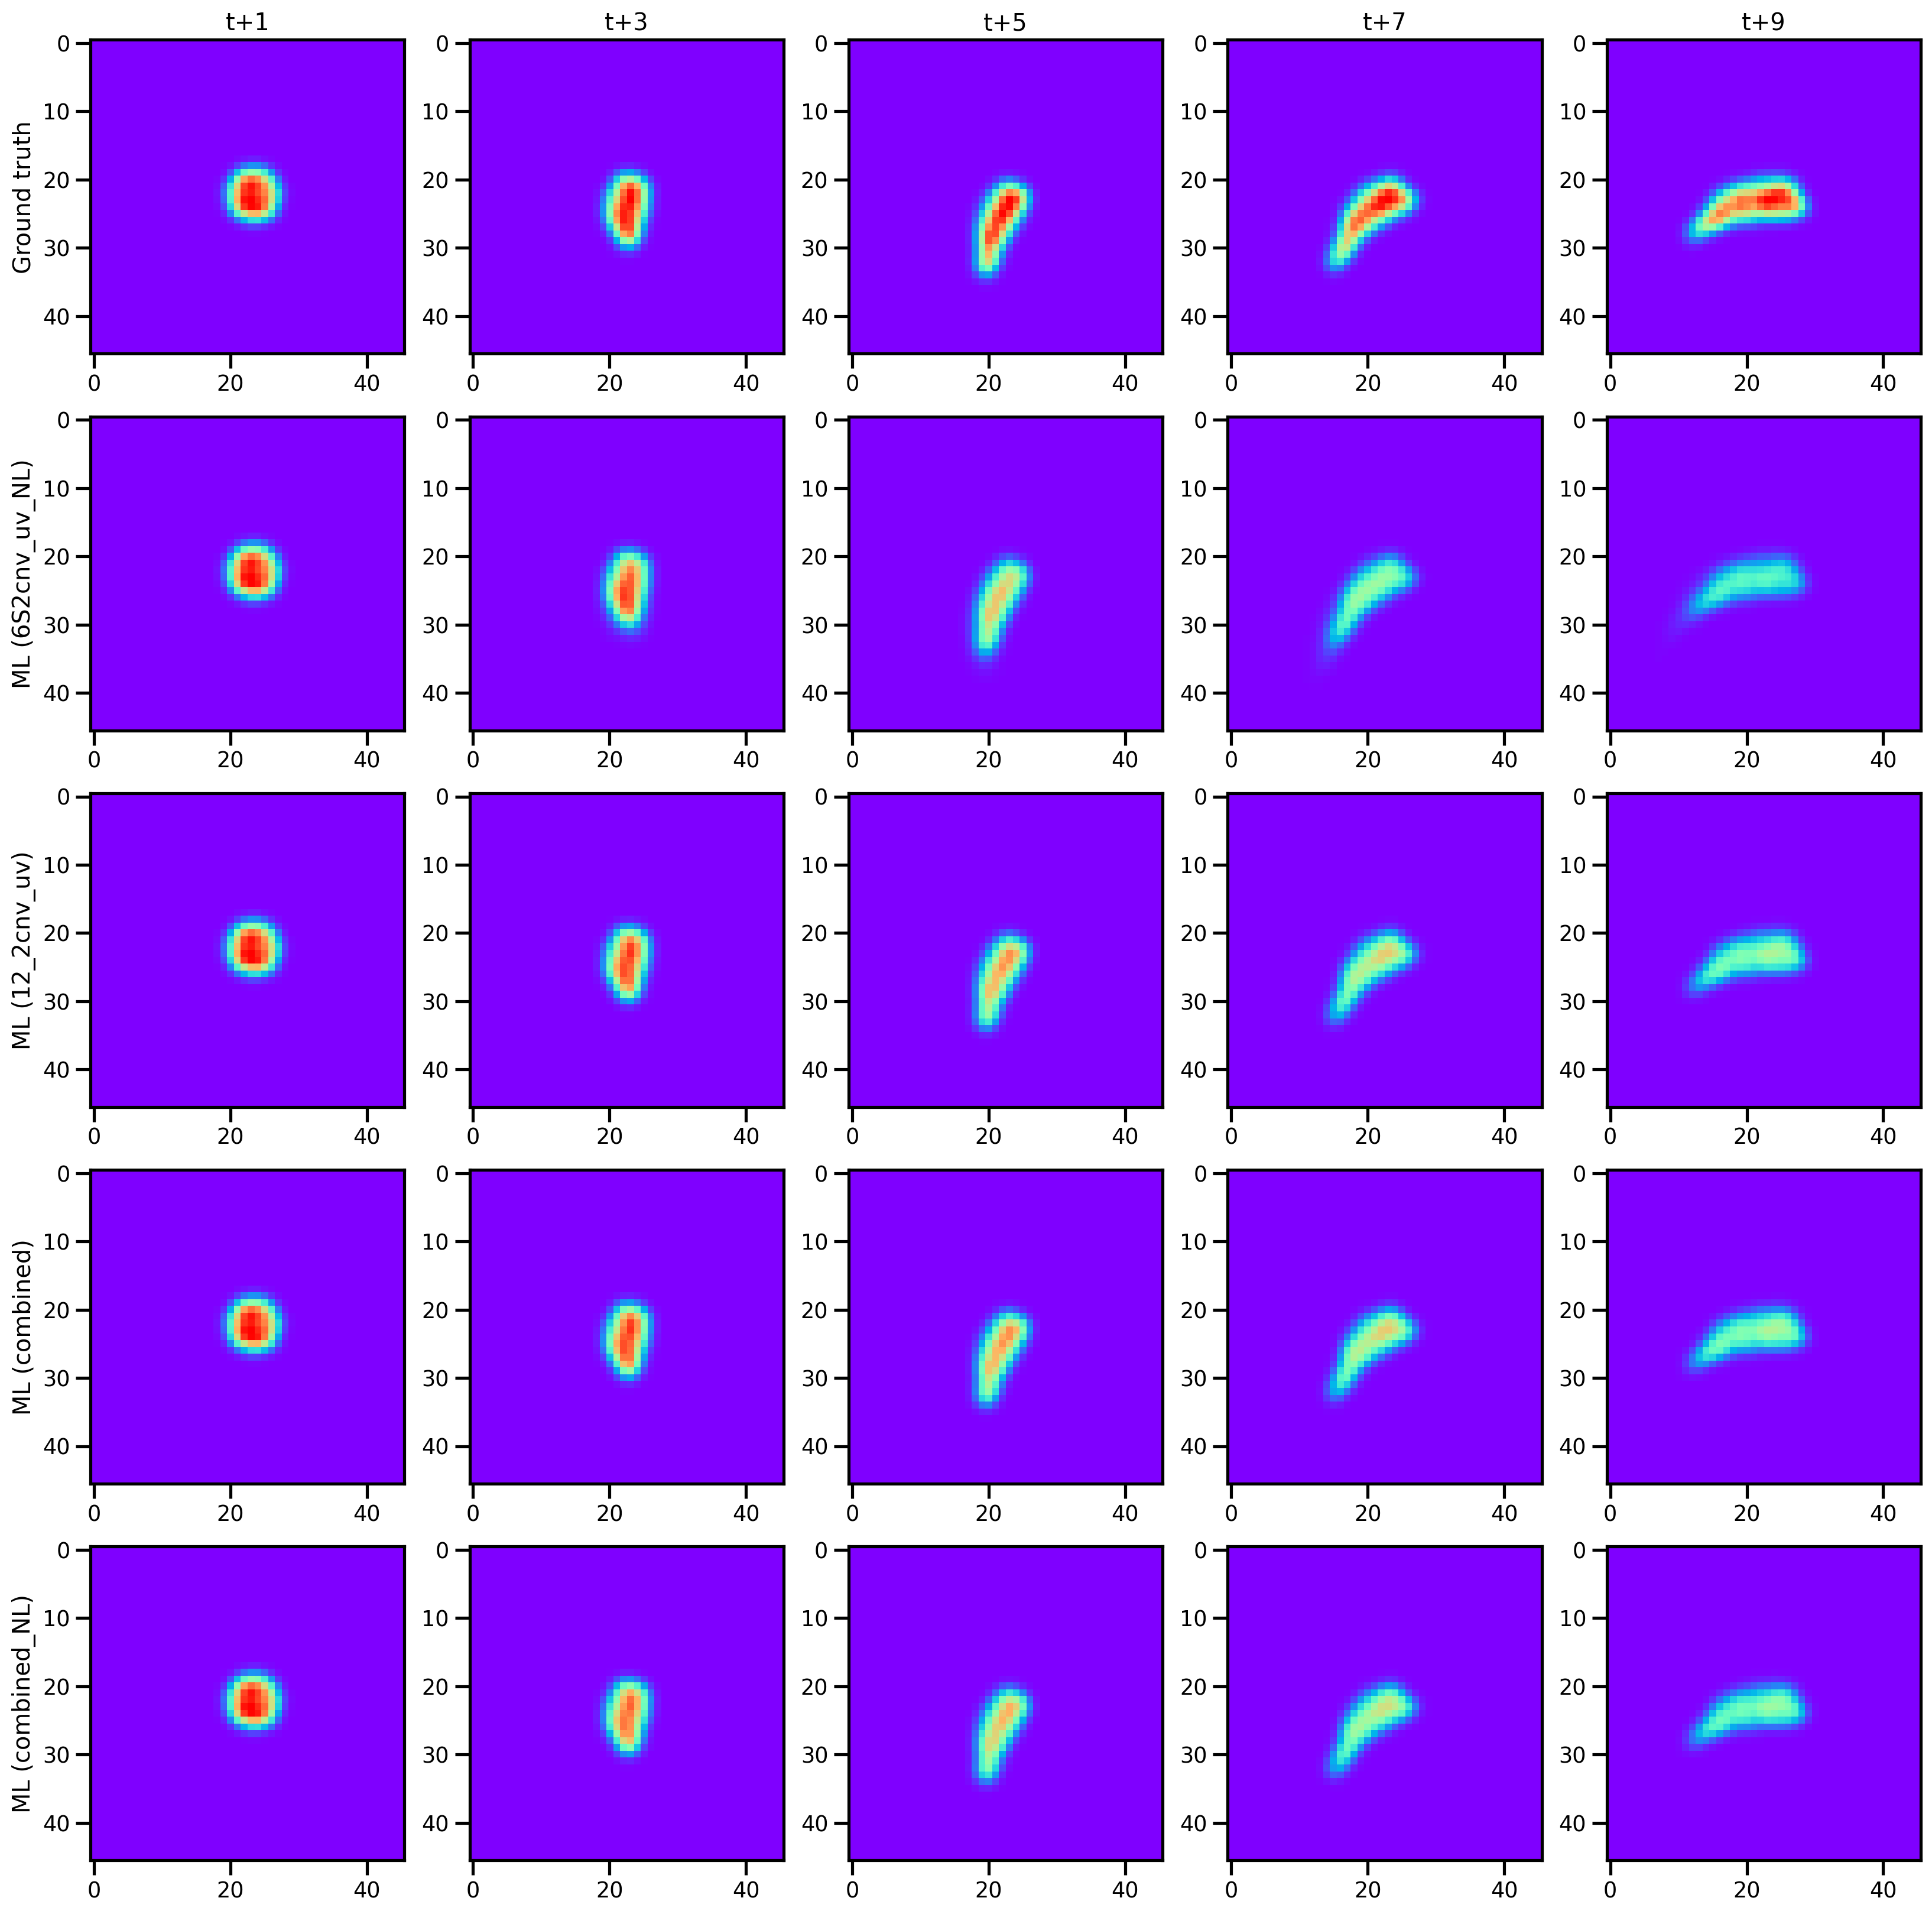

In [8]:
import matplotlib.cm as cm             

gt, ml12, ml62cN, cmb, cmbN=myfuncts.load_snapsm()

fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(20,20))
axs.shape


k=23
for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    #print(ind)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow)
    axs[1,j].imshow(ml62cN[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[2,j].imshow(ml12[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[3,j].imshow(cmb[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[4,j].imshow(cmbN[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (6S2cnv_uv_NL)')
axs[2,0].set_ylabel('ML (12_2cnv_uv)')
axs[3,0].set_ylabel('ML (combined)')
axs[4,0].set_ylabel('ML (combined_NL)')
plt.show()
#ml[i].sum()
#gt[i].sum()

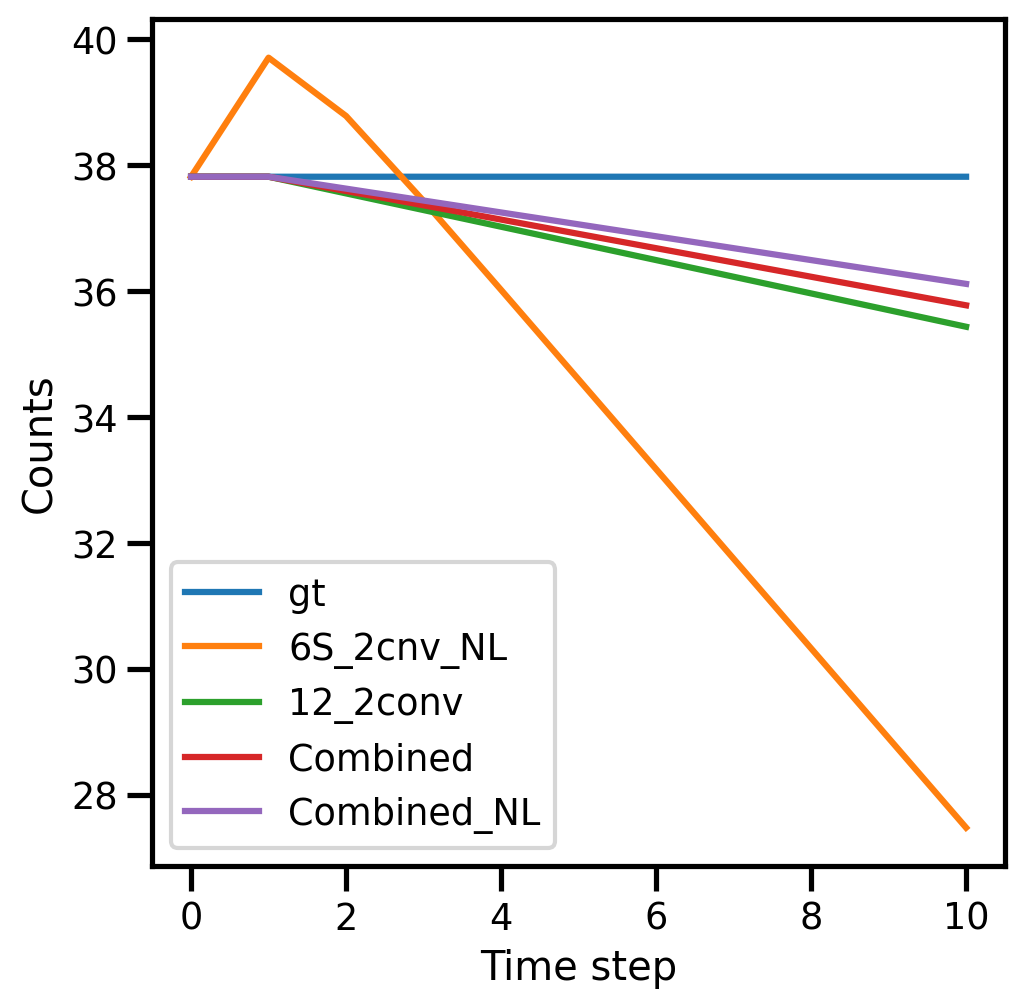

In [9]:
gt_, ml12_, ml62cN_, cmb_, cmbN_=myfuncts.load_snapsm_()
plt.rcParams["figure.figsize"] = [5.50, 5.50]
plt.plot(gt_, label='gt')
plt.plot(ml62cN_, label='6S_2cnv_NL')
plt.plot(ml12_, label='12_2conv')
plt.plot(cmb_, label='Combined')
plt.plot(cmbN_, label='Combined_NL')
    #print(sim.name)
plt.ylabel('Counts')
plt.xlabel('Time step')
plt.legend()

plt.show()